In [145]:
import numpy as np
import pylab as pl
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import accuracy_score

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

In [146]:
data = pd.read_csv("bladder_cancer.csv")
data = data.dropna()
data.isnull().sum()

Amp_1MHz        0
Phase_1MHz      0
Amp_500kHz      0
Phase_500kHz    0
Amp_100kHz      0
Phase_100kHz    0
Amp_50kHz       0
Phase_50kHz     0
Amp_10kHz       0
Phase_10kHz     0
Label           0
dtype: int64

In [147]:
X = data.drop(columns=['Label'], axis=1)
y = data['Label']
train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size = 0.2,random_state=0)

In [148]:
scaler = StandardScaler()
scaler.fit(train_feature)
train_feature_scaled = scaler.transform(train_feature)
test_feature_scaled = scaler.transform(test_feature)

In [154]:
estimator = DecisionTreeClassifier(random_state = 1)
max_depth = list(range(1, 16))
param_grid = {'criterion':['gini'], 'max_depth': max_depth}
grid = GridSearchCV(estimator, param_grid=param_grid,cv=5,scoring='accuracy', return_train_score=False,verbose=1) 
grid_search=grid.fit(train_feature_scaled, train_label)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [155]:
best_parameter=grid.best_estimator_
print(grid_search.best_params_)
print("best_score:", grid.best_score_)

{'criterion': 'gini', 'max_depth': 4}
best_score: 0.8833570412517779


In [156]:
predictions_test_set = best_parameter.predict(test_feature_scaled)

accuracy_score(test_label, predictions_test_set)

0.8125

In [157]:
results_df = pd.DataFrame(grid.cv_results_)
df_mean=results_df['mean_test_score']
df_mean

0     0.760882
1     0.830014
2     0.872546
3     0.883357
4     0.877952
5     0.872546
6     0.872546
7     0.877809
8     0.872262
9     0.877525
10    0.877525
11    0.877525
12    0.877525
13    0.877525
14    0.877525
Name: mean_test_score, dtype: float64

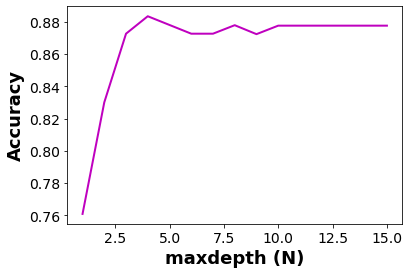

In [158]:
fig = plt.figure(1)
ax = plt.axes()


plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

ax.set_xlabel('maxdepth (N)', fontsize=18, fontdict=dict(weight='bold'))
ax.set_ylabel('Accuracy', fontsize=18, fontdict=dict(weight='bold'))

graph = ax.plot(max_depth,df_mean, "m-", linewidth=2)